In [51]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.signal import argrelextrema
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import signal
from scipy import misc
from scipy import stats
from scipy.interpolate import *
import math
import matplotlib.mlab as mlab
from astropy.modeling import models, fitting
import pandas as pd

In [52]:
pickle_in = open("AO-05_smoothed.pickle", "rb")
ao5smooth = pickle.load(pickle_in, encoding='latin1')
#print(ao5smooth)
pickle_inn = open("AO-06_smoothed.pickle", "rb")
ao6smooth = pickle.load(pickle_inn, encoding='latin1')

#for k, v in ao5smooth.items():
    #print(k, v)
    
for k, v in ao6smooth.items():
    print(k, v)
    
#ar = list(ao5smooth['weight'])
#print(ar[112:500])

kernel [[ 0.00074339  0.00052656  0.00033476 ...,  0.00033476  0.00052656
   0.00074339]
 [-0.00133809 -0.00094782 -0.00060257 ..., -0.00060257 -0.00094782
  -0.00133809]
 [-0.00091234 -0.00064624 -0.00041084 ..., -0.00041084 -0.00064624
  -0.00091234]
 ..., 
 [-0.00091234 -0.00064624 -0.00041084 ..., -0.00041084 -0.00064624
  -0.00091234]
 [-0.00133809 -0.00094782 -0.00060257 ..., -0.00060257 -0.00094782
  -0.00133809]
 [ 0.00074339  0.00052656  0.00033476 ...,  0.00033476  0.00052656
   0.00074339]]
weight [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.

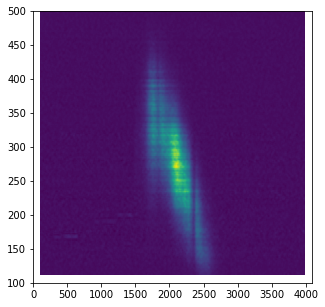

(512, 4096)


In [53]:
#AO-05 SMOOTHED DATA
smooth1 = ao5smooth['smoothed']

fig = plt.figure(figsize=(5,5))
plt.imshow(smooth1, aspect = 'auto')
plt.gca().invert_yaxis()
plt.ylim(100,500)
plt.show()
print(smooth1.shape)

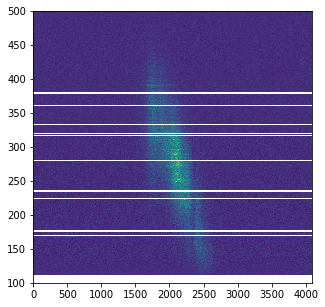

In [5]:
#AO-05 RAW DATA
data1 = ao5smooth['data']

fig = plt.figure(figsize=(5,5))
plt.imshow(data1, aspect = 'auto')
plt.gca().invert_yaxis()
plt.ylim(100,500)
plt.show()
#print(data1.shape)
#print(data1[375:390])

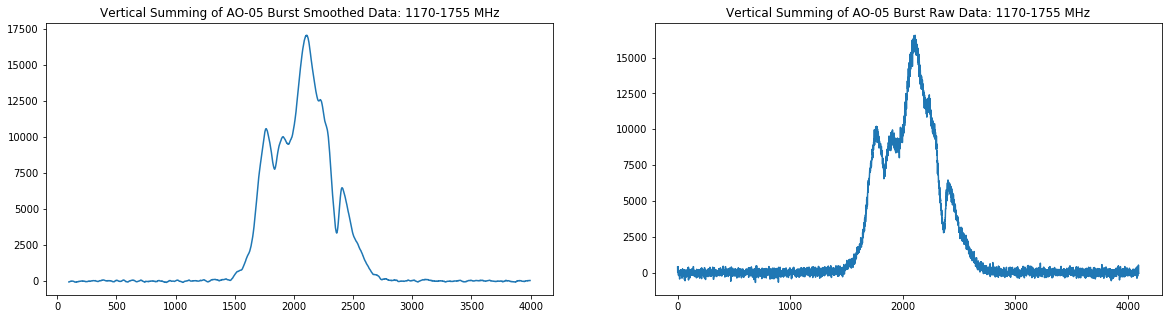

In [12]:
#MATCHING RESULT: See Figure 2 in Hessels et. al 2018 Burst paper for profile with DM 560.54 cm^-3pc
o5sum = smooth1.sum(axis=0)
fig = plt.figure(figsize = (20,5))
ax1 = fig.add_subplot(121)
plt.plot(o5sum)
plt.title("Vertical Summing of AO-05 Burst Smoothed Data: 1170-1755 MHz")


o5sumraw = data1.sum(axis=0)
ax2 = fig.add_subplot(122)
plt.plot(o5sumraw)
plt.title("Vertical Summing of AO-05 Burst Raw Data: 1170-1755 MHz")
plt.show()

In [16]:
argrelextrema(o5sum[2300:2500], np.greater)

(array([107]),)

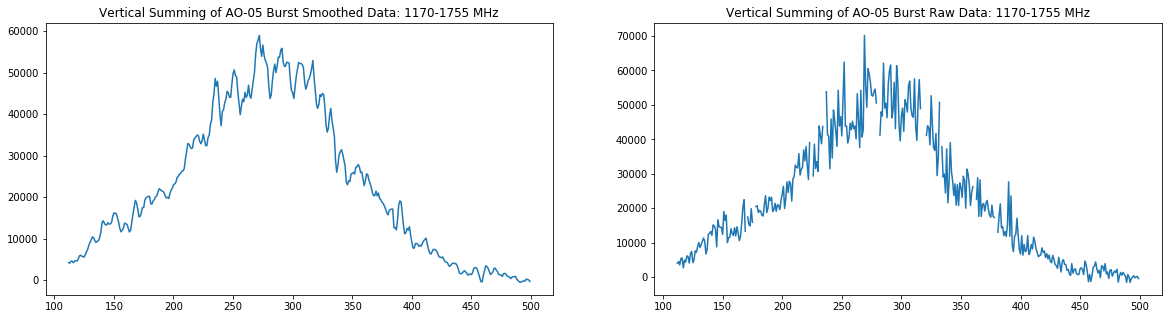

In [57]:
o5sum = smooth1.sum(axis=1)
fig = plt.figure(figsize = (20,5))
ax1 = fig.add_subplot(121)
plt.plot(o5sum)
plt.title("Vertical Summing of AO-05 Burst Smoothed Data: 1170-1755 MHz")


o5sumraw = data1.sum(axis=1)
ax2 = fig.add_subplot(122)
plt.plot(o5sumraw)
plt.title("Vertical Summing of AO-05 Burst Raw Data: 1170-1755 MHz")
plt.show()

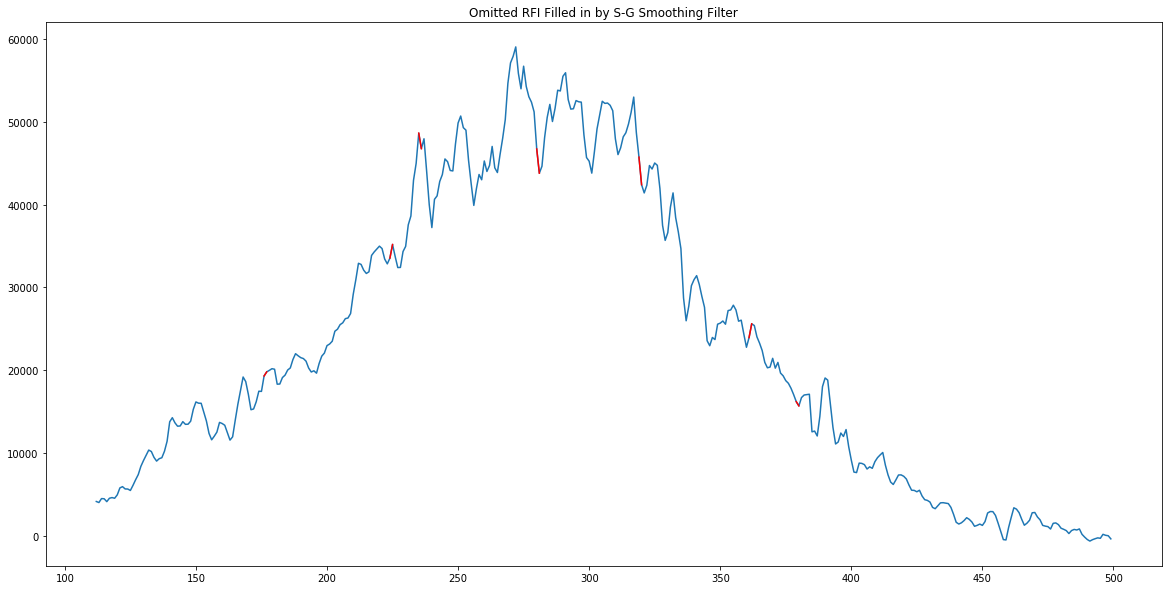

In [58]:
weight1 = ao5smooth['weight']
invwt = np.logical_not(weight1).astype(int)
o5sumpc = np.multiply(o5sum, invwt)

o5 = np.asarray(o5sumpc)

o5[o5 == 0] = pd.np.nan

fig = plt.figure(figsize = (20,10))

#plt.plot(o5)

plt.plot(o5sum)
plt.plot(o5, c = 'r')

plt.title("Omitted RFI Filled in by S-G Smoothing Filter")
plt.show()

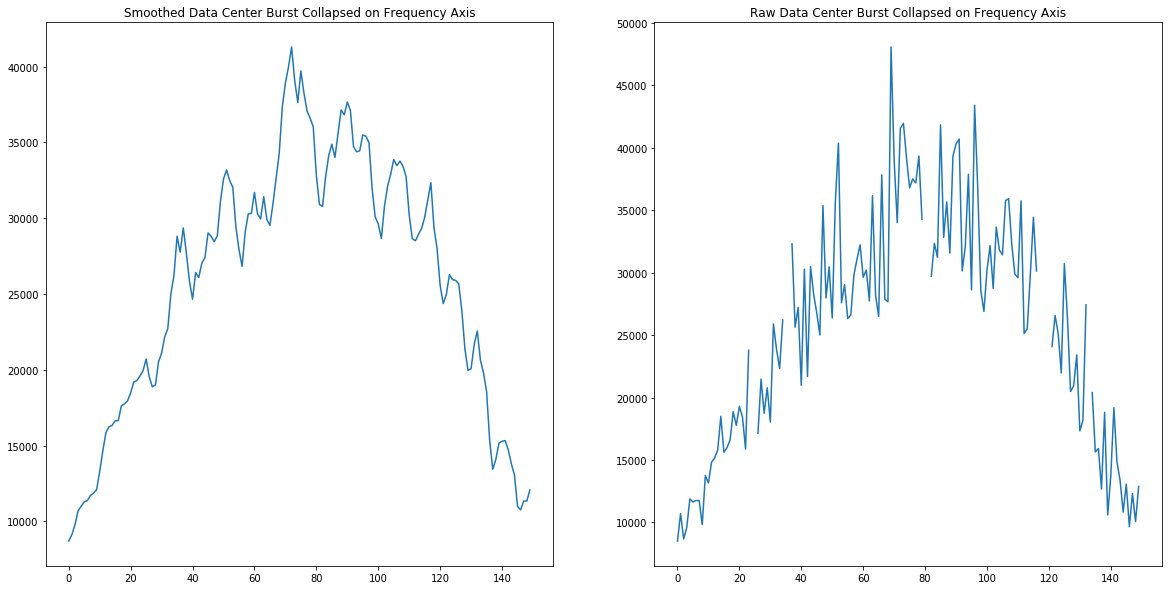

In [59]:
centburst = smooth1[200:350, 1900:2250]
centsum = centburst.sum(axis=1)
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(121)
plt.plot(centsum)
plt.title("Smoothed Data Center Burst Collapsed on Frequency Axis")


centburstr = data1[200:350, 1900:2250]
centsumr = centburstr.sum(axis=1)
ax2 = fig.add_subplot(122)
plt.plot(centsumr)
plt.title("Raw Data Center Burst Collapsed on Frequency Axis")
plt.show()

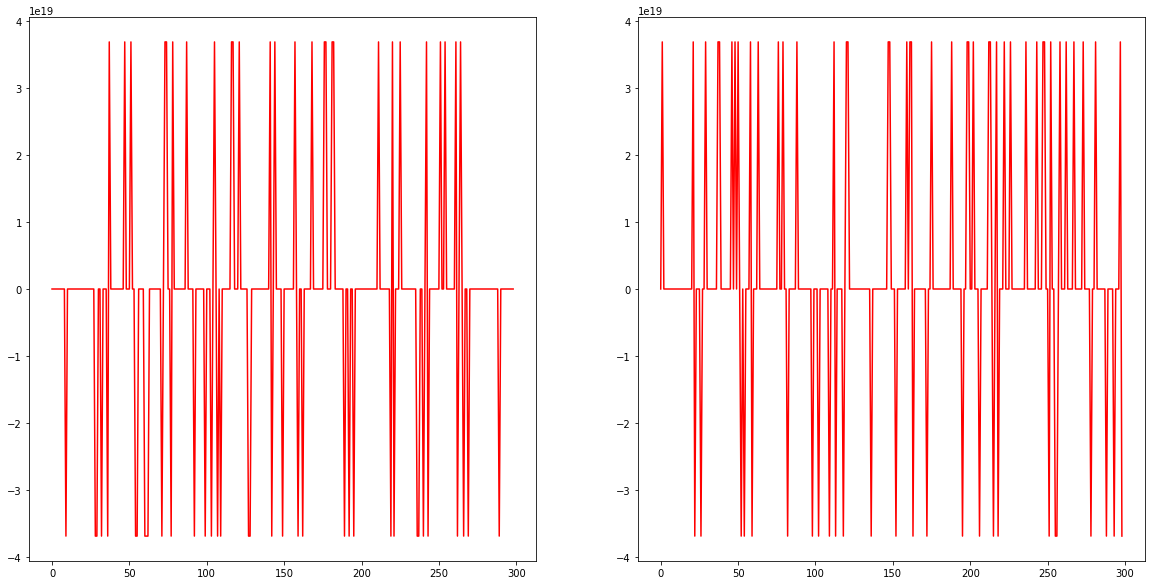

In [60]:
#FAILED? ATTEMPT AT AUTOCORRELATION/CONVOLUTION

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result

def convol(x):
    result1 = np.convolve(x, x, mode='full')
    return result1

acorr = autocorr(centsum)
convo = convol(centsum)

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(121)
plt.plot(acorr, c = 'r')
ax2 = fig.add_subplot(122)
plt.plot(convo, c = 'r')
plt.show()

/Users/jakobtfaber/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


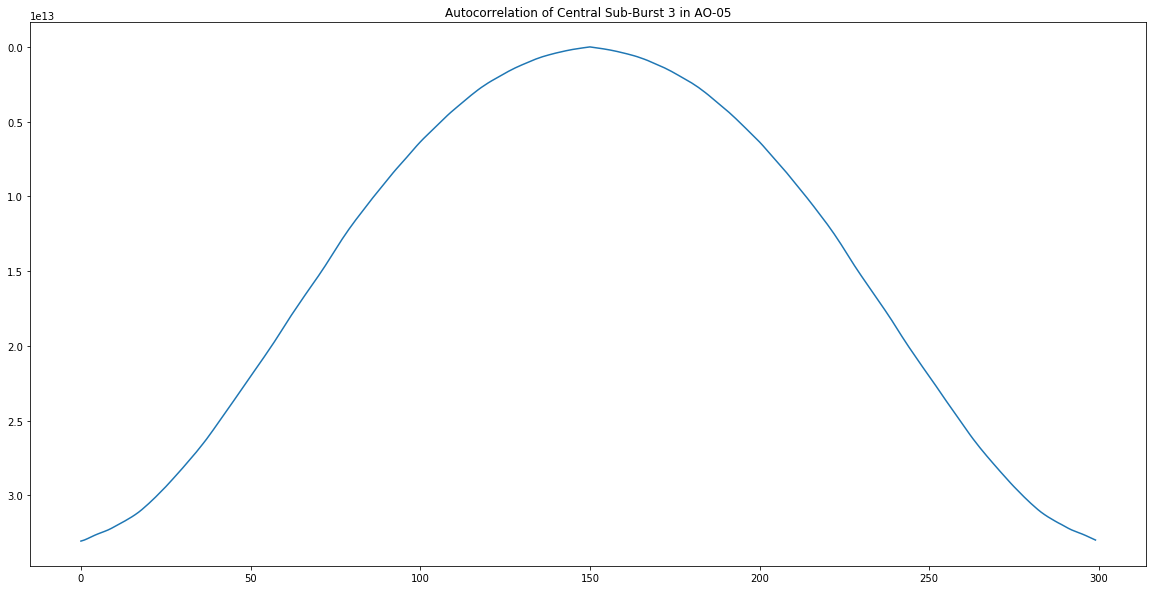

In [104]:
#DOING ARRAY PADDING AND FOURIER TRANSFROM ACF FOR CENTRAL BURST 3 IN AO-05

pad = np.zeros(centsum.size)
padcent = np.append(centsum, pad)

#print(padcent)

def autocorrel(x):
    f = np.fft.fft(x)
    fmod = np.square(np.absolute(f))
    ft = np.fft.fft(fmod)
    return ft

acor = autocorrel(padcent)

#print(acor)
fig = plt.figure(figsize = (20, 10))
plt.plot(acor)
plt.gca().invert_yaxis()
plt.title("Autocorrelation of Central Sub-Burst 3 in AO-05")
plt.show()

In [93]:
racor = np.real(acor)

print(meanacf)
print(stdacf)
#print(racor)

racorlow = np.divide(racor, [1e+13])

meanacf = np.mean(racorlow)
stdacf = np.std(racorlow)


1.49344737246
1.13929401829


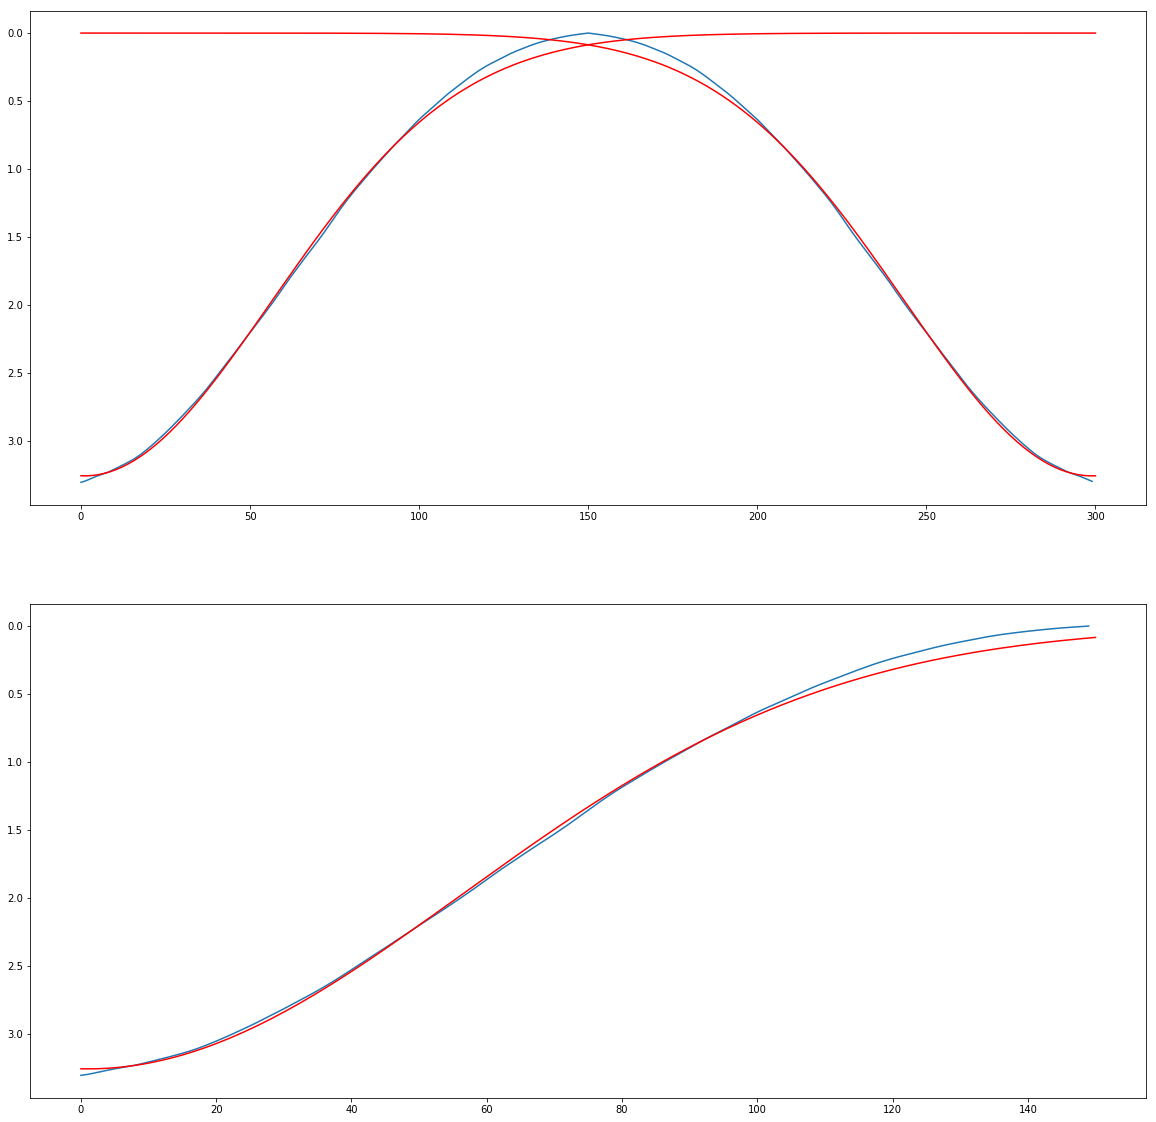

In [114]:
#FITTING GAUSSIAN REFLECTIONS TO THE DISCONTINUOUS BELL CURVE

x = np.linspace(0,300,300)
y = racorlow
#g_init = models.Gaussian1D(amplitude=1., mean=1083.98455775, stddev=902.527707618)
g_init = models.Gaussian1D(amplitude=1., mean=1.49344737246, stddev=1.13929401829)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(211)
plt.plot(racorlow)
plt.plot(x, np.flip(g(x), axis = 0), label = 'Gaussian', c = 'r')
plt.plot(x, g(x), label='Gaussian', c = 'r')
plt.gca().invert_yaxis()

ax2 = fig.add_subplot(212)
x = np.linspace(0,150,150)
y = racorlow[0:150]
plt.plot(racorlow[0:150])
plt.plot(x, g(x), label='Gaussian', c = 'r')
plt.gca().invert_yaxis()



plt.show()

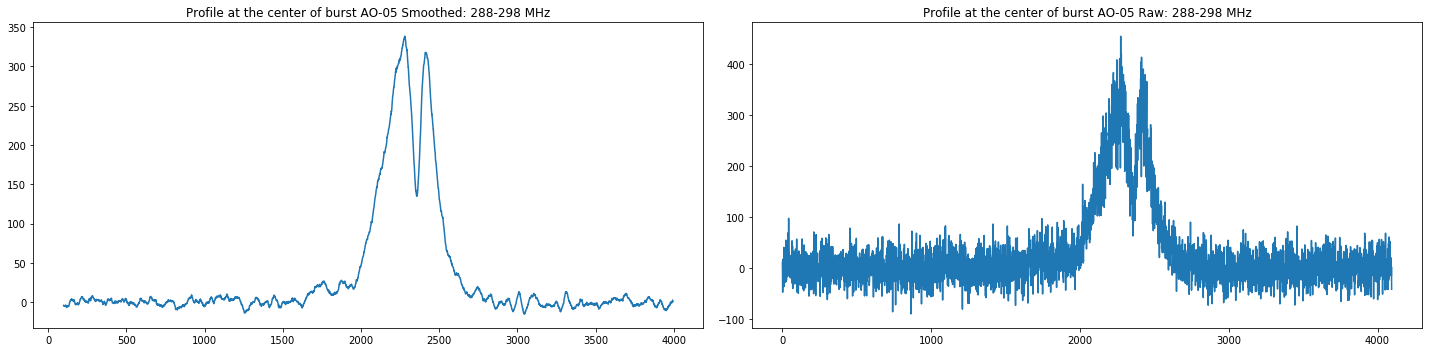

In [64]:
#plot for range ~10 MHz from ~288-298 MHz in SMOOTHED DATA SET
#the suming is centered at approx. the mid. of the tot. vert. array
#this corresponds to array elements 191 to 197 vertical
#there's a summing operation along the vertical axis
subb = smooth1[191:197, :]
subsum = subb.sum(axis=0)
fig = plt.figure(figsize = (20,5))
ax1 = fig.add_subplot(121)
plt.plot(subsum)
plt.title("Profile at the center of burst AO-05 Smoothed: 288-298 MHz")

subbraw = data1[191:197, :]
subrawsum = subbraw.sum(axis=0)
ax2 = fig.add_subplot(122)
plt.plot(subrawsum)
plt.title("Profile at the center of burst AO-05 Raw: 288-298 MHz")
plt.tight_layout()
plt.show()

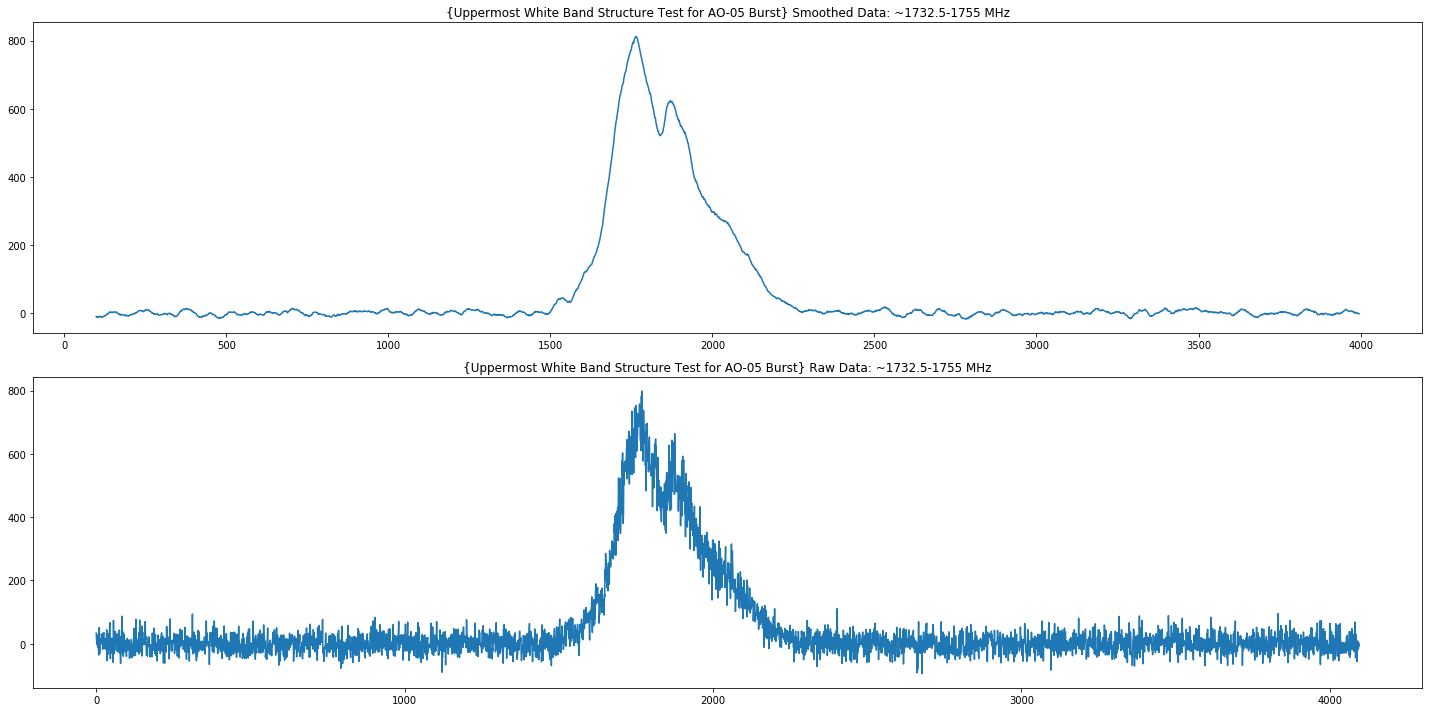

In [65]:
# wbt means white band test, s = smooth, r = raw for uppermost frequency band in plot
#This is to test to see if the bands we see in the smoothed plot are false structure generated by the...
#...Savitsky-Golay filter
wbts5 = smooth1[375:390, :]
wbtssum = wbts5.sum(axis=0)
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(211)
plt.title("{Uppermost White Band Structure Test for AO-05 Burst} Smoothed Data: ~1732.5-1755 MHz")
plt.plot(wbtssum)


wbtr5 = data1[375:390, :]
wbtrsum = wbtr5.sum(axis=0)
ax2 = fig.add_subplot(212)
plt.title("{Uppermost White Band Structure Test for AO-05 Burst} Raw Data: ~1732.5-1755 MHz")
plt.plot(wbtrsum)
plt.tight_layout()
plt.show()

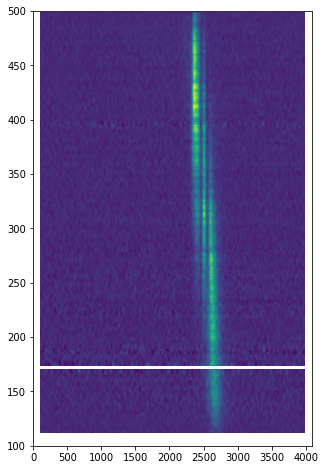

(512, 4096)


In [66]:
#AO-06 SMOOTHED DATA
smooth2 = ao6smooth['smoothed']

fig = plt.figure(figsize=(5,8))
plt.imshow(smooth2, aspect = 'auto')
plt.gca().invert_yaxis()
plt.ylim(100,500)
plt.show()
print(smooth2.shape)


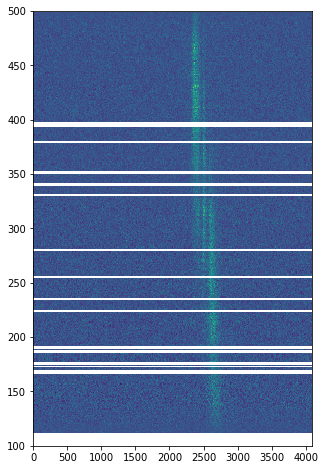

(512, 4096)


In [67]:
#AO-06 RAW DATA
data2 = ao6smooth['data']

fig = plt.figure(figsize=(5,8))
plt.imshow(data2, aspect = 'auto')
plt.gca().invert_yaxis()
plt.ylim(100,500)
plt.show()
print(data2.shape)

#AUTOCORRELATION OF AO-06 RAW DATA

corr = signal.correlate2d(data2, data2, boundary='symm', mode='same')
#y, x = np.unravel_index(np.argmax(corr), corr.shape) # find the match
plt.imshow(corr, cmap='gray')
plt.show()

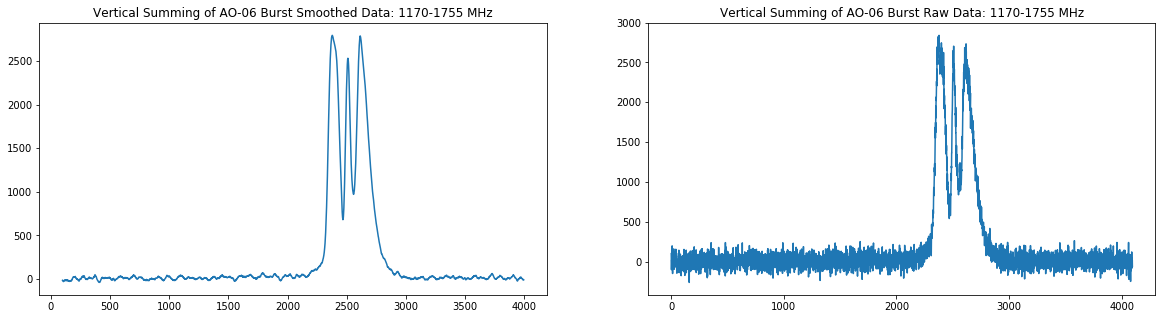

In [68]:
o6sum = smooth2.sum(axis=0)
fig = plt.figure(figsize = (20,5))
ax1 = fig.add_subplot(121)
plt.plot(o6sum)
plt.title("Vertical Summing of AO-06 Burst Smoothed Data: 1170-1755 MHz")


o6sumraw = data2.sum(axis=0)
ax2 = fig.add_subplot(122)
plt.plot(o6sumraw)
plt.title("Vertical Summing of AO-06 Burst Raw Data: 1170-1755 MHz")
plt.show()

In [69]:
argrelextrema(o6sum[2500:2700], np.greater)

(array([ 10, 114]),)

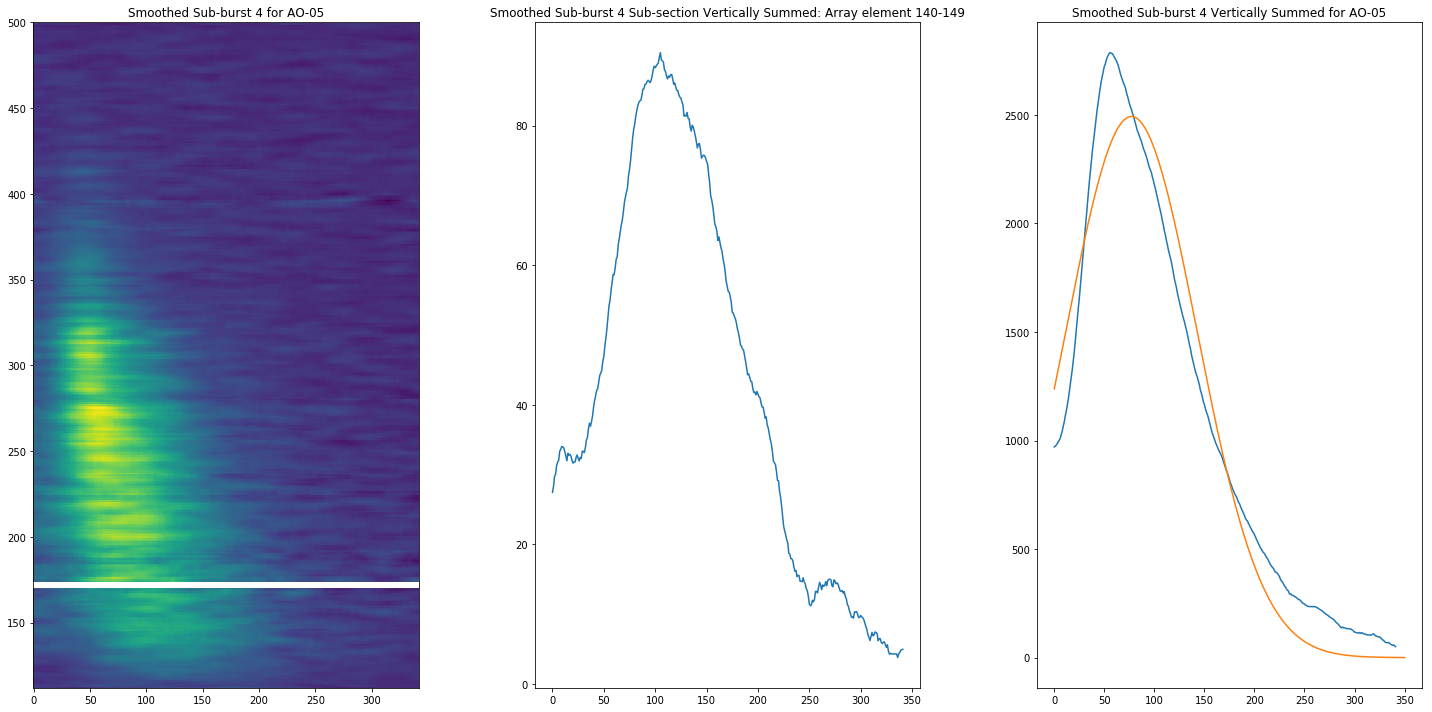

In [85]:
#FIND LOCAL MIN/MAX TO DETERMINE DIFFERENT SUBBURSTS
argrelextrema(o6sum[2500:2700], np.less)
#print(o6sum[58])

#RANGE FOR SUBBURST 4 SEEMINGLY BEGINS AT ELEMENT 2558 WITH PEAK AT 2614 AND ENDS, LET'S SAY (BY EYE), AT 2900
#NOW WE TAKE THAT RANGE AND ISOLATE IT

sburst4 = smooth2[:, 2558:2900]
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(131)
plt.imshow(sburst4, aspect = 'auto')
plt.gca().invert_yaxis()
plt.ylim(112,500)
plt.title("Smoothed Sub-burst 4 for AO-05")


sburst41 = smooth2[:, 2630:2700]
b41sum = sburst41.sum(axis=0)

sburst42 = smooth2[:, 2558:2630]
b42sum = sburst42.sum(axis=0)

sburstsec = smooth2[140:149, 2558:2900]
b4summ = sburstsec.sum(axis=0)

ax3 = fig.add_subplot(132)
plt.plot(b4summ)
plt.title("Smoothed Sub-burst 4 Sub-section Vertically Summed: Array element 140-149")

b4sum = sburst4.sum(axis=0)
ax2 = fig.add_subplot(133)
plt.plot(b4sum)
plt.title("Smoothed Sub-burst 4 Vertically Summed for AO-05")

x = np.linspace(0,350,342)
y = b4sum
#g_init = models.Gaussian1D(amplitude=1., mean=1083.98455775, stddev=902.527707618)
g_init = models.Gaussian1D(amplitude=1., mean=1500, stddev=1200)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)
plt.plot(x, g(x), label='Gaussian')

gg_init = models.Gaussian1D(amplitude=1., mean=1083.98455775, stddev=902.527707618) + models.Gaussian1D(amplitude=1, mean=2007.17522321, stddev=384.431296669)
#+ models.Gaussian1D(amplitude=1, mean=2026.59461806, stddev=679.102669804)
#fitter = fitting.SLSQPLSQFitter()
#gg_fit = fitter(gg_init, x, y)

#plt.plot(x, gg_fit(x))
plt.tight_layout()

plt.show()

In [71]:
mx2 = np.ma.masked_array(b41sum, np.isnan(b41sum))
print("Array mean for second piece of sub-burst", mx2.mean())
print("Array std for second piece of sub-burst", mx2.std())

mx1 = np.ma.masked_array(b42sum, np.isnan(b42sum))
print("Array mean for first piece of sub-burst", mx1.mean())
print("Array std for second piece of sub-burst", mx1.std())

Array mean for second piece of sub-burst 2007.17522321
Array std for second piece of sub-burst 384.431296669
Array mean for first piece of sub-burst 2026.59461806
Array std for second piece of sub-burst 679.102669804


In [72]:
mx = np.ma.masked_array(b4sum, np.isnan(b4sum))
print("Array mean whole sub-burst", mx.mean())
print("Array std whole sub-burst", mx.std())

Array mean whole sub-burst 1083.98455775
Array std whole sub-burst 902.527707618


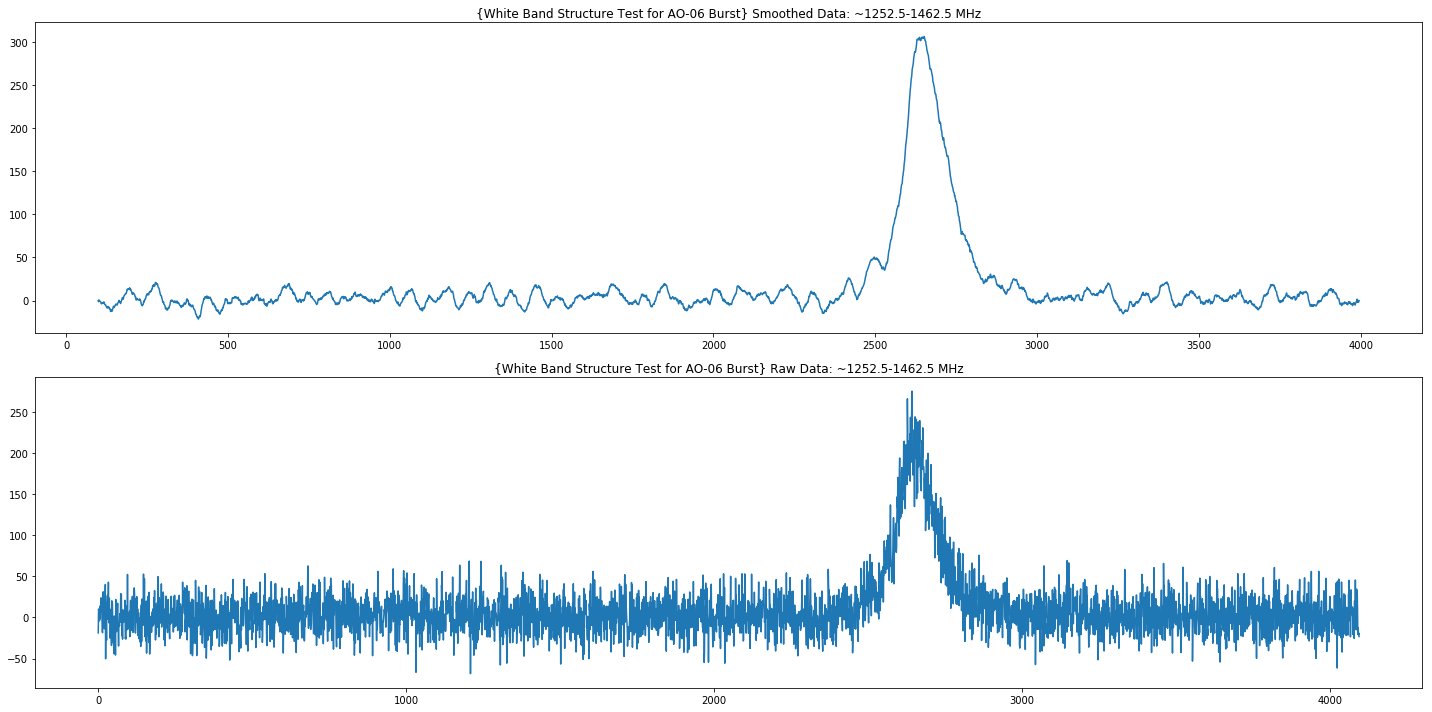

In [73]:
wbts62 = smooth2[165:195, :]
wbtssum = wbts62.sum(axis=0)
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(211)
plt.title("{White Band Structure Test for AO-06 Burst} Smoothed Data: ~1252.5-1462.5 MHz")
plt.plot(wbtssum)


wbtr62 = data2[165:195, :]
wbtrsum = wbtr62.sum(axis=0)
ax2 = fig.add_subplot(212)
plt.title("{White Band Structure Test for AO-06 Burst} Raw Data: ~1252.5-1462.5 MHz")
plt.plot(wbtrsum)
plt.tight_layout()
plt.show()

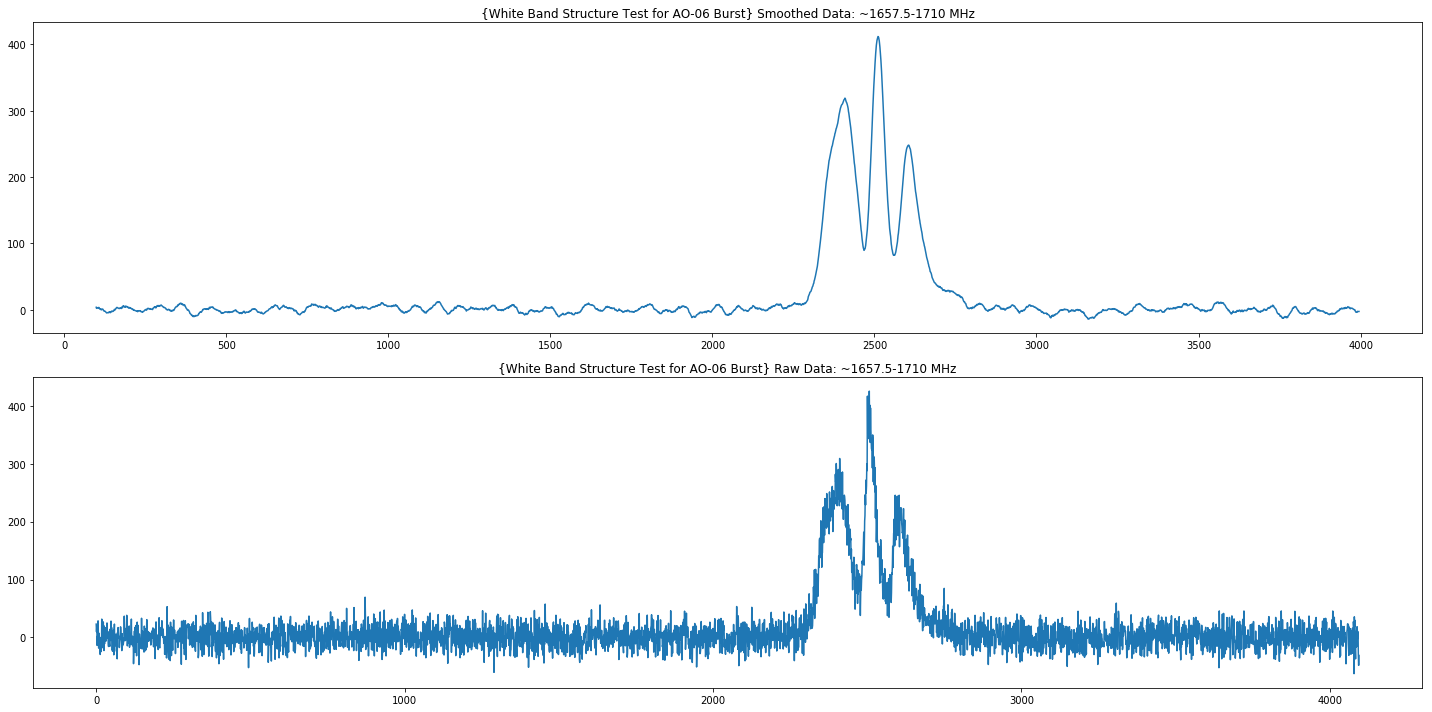

In [74]:
wbts63 = smooth2[325:360, :]
wbtssum = wbts63.sum(axis=0)
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(211)
plt.title("{White Band Structure Test for AO-06 Burst} Smoothed Data: ~1657.5-1710 MHz")
plt.plot(wbtssum)


wbtr6 = data2[325:360, :]
wbtrsum = wbtr6.sum(axis=0)
ax2 = fig.add_subplot(212)
plt.title("{White Band Structure Test for AO-06 Burst} Raw Data: ~1657.5-1710 MHz")
plt.plot(wbtrsum)
plt.tight_layout()
plt.show()

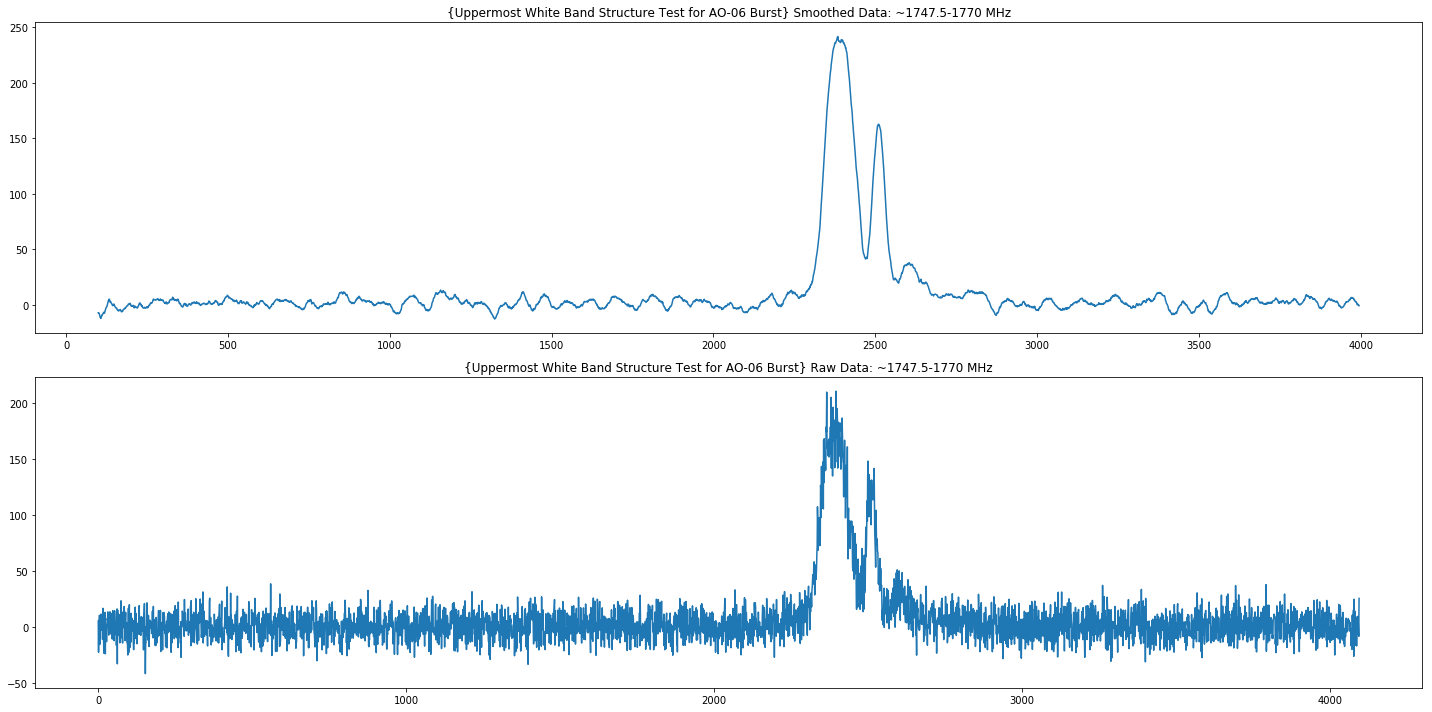

In [75]:
wbts61 = smooth2[385:400, :]
wbtssum = wbts61.sum(axis=0)
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(211)
plt.title("{Uppermost White Band Structure Test for AO-06 Burst} Smoothed Data: ~1747.5-1770 MHz")
plt.plot(wbtssum)


wbtr61 = data2[385:400, :]
wbtrsum = wbtr61.sum(axis=0)
ax2 = fig.add_subplot(212)
plt.title("{Uppermost White Band Structure Test for AO-06 Burst} Raw Data: ~1747.5-1770 MHz")
plt.plot(wbtrsum)
plt.tight_layout()
plt.show()

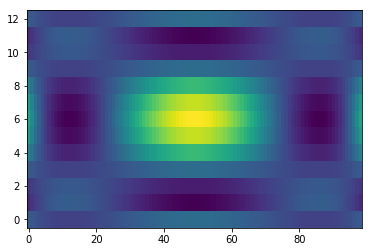

(13, 99)


In [76]:
#SAVITSKY-GOLAY SMOOTHING FILTER
kernel = ao5smooth['kernel']

plt.imshow(kernel, aspect = 'auto')
plt.gca().invert_yaxis()
plt.show()
print(kernel.shape)